# Run model module locally

In [ ]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(32)
os.environ["TRAIN_STEPS"] = str(200)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(1000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(32)
os.environ["EVAL_STEPS"] = str(100)
os.environ["START_DELAY_SECS"] = str(60)
os.environ["THROTTLE_SECS"] = str(120)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,256"
os.environ["GENERATOR_NUM_FILTERS"] = "128,128,128"
os.environ["GENERATOR_KERNEL_SIZES"] = "4,4,4"
os.environ["GENERATOR_STRIDES"] = "2,2,2"
os.environ["GENERATOR_FINAL_NUM_FILTERS"] = str(3)
os.environ["GENERATOR_FINAL_KERNEL_SIZE"] = str(5)
os.environ["GENERATOR_FINAL_STRIDE"] = str(2)
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_USE_BATCH_NORMALIZATION"] = "True"
os.environ["GENERATOR_FINAL_ACTIVATION"] = "tanh"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.00005)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = str(5.0)
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for critic hyperparameters.
os.environ["CRITIC_NUM_FILTERS"] = "64,128,128,256"
os.environ["CRITIC_KERNEL_SIZES"] = "3,3,3,3"
os.environ["CRITIC_STRIDES"] = "1,2,2,2"
os.environ["CRITIC_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["CRITIC_USE_LAYER_NORMALIZATION"] = "True"
os.environ["CRITIC_L1_REGULARIZATION_SCALE"] = str(0.01)
os.environ["CRITIC_L2_REGULARIZATION_SCALE"] = str(0.01)
os.environ["CRITIC_OPTIMIZER"] = "Adam"
os.environ["CRITIC_LEARNING_RATE"] = str(0.00005)
os.environ["CRITIC_ADAM_BETA1"] = str(0.5)
os.environ["CRITIC_ADAM_BETA2"] = str(0.999)
os.environ["CRITIC_ADAM_EPSILON"] = str(1e-8)
os.environ["CRITIC_CLIP_GRADIENTS"] = str(5.0)
os.environ["CRITIC_GRADIENT_PENALTY_COEFFICIENT"] = str(10.0)
os.environ["CRITIC_TRAIN_STEPS"] = str(5)


## Train WGAN-GP model

In [7]:
%%bash
gsutil rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/wgan_gp_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_num_filters=${GENERATOR_NUM_FILTERS} \
    --generator_kernel_sizes=${GENERATOR_KERNEL_SIZES} \
    --generator_strides=${GENERATOR_STRIDES} \
    --generator_final_num_filters=${GENERATOR_FINAL_NUM_FILTERS} \
    --generator_final_kernel_size=${GENERATOR_FINAL_KERNEL_SIZE} \
    --generator_final_stride=${GENERATOR_FINAL_STRIDE} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_use_batch_normalization=${GENERATOR_USE_BATCH_NORMALIZATION} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --critic_num_filters=${CRITIC_NUM_FILTERS} \
    --critic_kernel_sizes=${CRITIC_KERNEL_SIZES} \
    --critic_strides=${CRITIC_STRIDES} \
    --critic_leaky_relu_alpha=${CRITIC_LEAKY_RELU_ALPHA} \
    --critic_use_layer_normalization=${CRITIC_USE_LAYER_NORMALIZATION} \
    --critic_l1_regularization_scale=${CRITIC_L1_REGULARIZATION_SCALE} \
    --critic_l2_regularization_scale=${CRITIC_L2_REGULARIZATION_SCALE} \
    --critic_optimizer=${CRITIC_OPTIMIZER} \
    --critic_learning_rate=${CRITIC_LEARNING_RATE} \
    --critic_adam_beta1=${CRITIC_ADAM_BETA1} \
    --critic_adam_beta2=${CRITIC_ADAM_BETA2} \
    --critic_adam_epsilon=${CRITIC_ADAM_EPSILON} \
    --critic_clip_gradients=${CRITIC_CLIP_GRADIENTS} \
    --critic_gradient_penalty_coefficient=${CRITIC_GRADIENT_PENALTY_COEFFICIENT} \
    --critic_train_steps=${CRITIC_TRAIN_STEPS}


train_and_evaluate: args = {'train_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/train*.tfrecord', 'eval_file_pattern': 'gs://machine-learning-1234-bucket/gan/data/cifar10_car/test*.tfrecord', 'output_dir': 'gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/', 'train_batch_size': 32, 'train_steps': 200, 'save_summary_steps': 100, 'save_checkpoints_steps': 1000, 'keep_checkpoint_max': 10, 'eval_batch_size': 32, 'eval_steps': 100, 'start_delay_secs': 60, 'throttle_secs': 120, 'height': 32, 'width': 32, 'depth': 3, 'latent_size': 512, 'generator_projection_dims': [4, 4, 256], 'generator_num_filters': [128, 128, 128], 'generator_kernel_sizes': [4, 4, 4], 'generator_strides': [2, 2, 2], 'generator_final_num_filters': 3, 'generator_final_kernel_size': 5, 'generator_final_stride': 2, 'generator_leaky_relu_alpha': 0.2, 'generator_use_batch_normalization': True, 'generator_final_activation': 'tanh', 'generator_l1_regularization_scale': 0.01, 'generator_l2_re

Removing gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/#1592574380285292...
Removing gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/checkpoint#1592574657741979...
Removing gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/eval/#1592574687354082...
Removing gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/eval/events.out.tfevents.1592574687.tf-1-15#1592574689336215...
/ [4 objects]                                                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m rm ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Removing gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/events.out.tfevents.1592574381.tf-1-15#1592574700856571...
Removing gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model2/export/#1592574690717272...
Removing gs://mach

## Prediction

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [18]:
!gsutil ls gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter

gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/
gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592571310/
gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592576252/
gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592580812/
gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592585336/
gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592589848/


In [19]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592589848"
)
predictions = predict_fn(
    {
        "Z": np.random.normal(size=(10, 512))
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/wgan_gp/trained_model/export/exporter/1592589848/variables/variables


In [20]:
print(list(predictions.keys()))

['generated_images']


Convert image back to the original scale.

In [21]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [22]:
print(generated_images.shape)

(10, 32, 32, 3)


In [23]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, height, width, depth].
        
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            image,
            cmap=plt.cm.binary
        )
    plt.show()

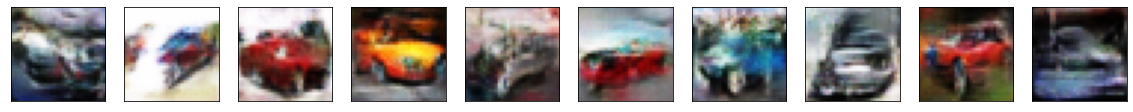

In [24]:
plot_images(generated_images)